In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers,optimizers,Sequential

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [32]:
train_dta = image_dataset_from_directory(
"E:/126156156/Bean_Dataset",
validation_split=0.2,
subset="training",
seed = 42,
verbose = True,
batch_size=32,
shuffle=True,
image_size=(256,256))

Found 990 files belonging to 3 classes.
Using 792 files for training.


In [33]:
validation_dta = image_dataset_from_directory(
"E:/126156156/Bean_Dataset",
validation_split=0.2,
subset="validation",
seed = 42,
verbose = True,
batch_size=32,
shuffle=True,
image_size=(256,256))

Found 990 files belonging to 3 classes.
Using 198 files for validation.


In [35]:
for img , label in train_dta.take(1):
    print(img)

tf.Tensor(
[[[[4.19776611e+01 7.50245361e+01 0.00000000e+00]
   [4.22717896e+01 7.14592896e+01 0.00000000e+00]
   [5.09001465e+01 7.54286499e+01 5.81652832e+00]
   ...
   [1.34266907e+02 1.56735657e+02 4.45302124e+01]
   [1.08303467e+02 1.37920654e+02 2.16957397e+01]
   [9.53432007e+01 1.27390076e+02 8.96038818e+00]]

  [[4.14321899e+01 7.24321899e+01 0.00000000e+00]
   [4.33580933e+01 7.36229248e+01 0.00000000e+00]
   [4.98060913e+01 7.55708618e+01 2.27697754e+00]
   ...
   [1.22997314e+02 1.44677429e+02 2.90680542e+01]
   [1.06205505e+02 1.35731812e+02 7.09771729e+00]
   [1.02185852e+02 1.32571533e+02 2.24914551e-01]]

  [[3.88395386e+01 6.70867920e+01 3.64868164e-01]
   [3.76241455e+01 6.74058228e+01 2.18322754e-01]
   [3.85293579e+01 6.47618408e+01 0.00000000e+00]
   ...
   [1.25131165e+02 1.52951721e+02 3.31607666e+01]
   [1.18611511e+02 1.47479980e+02 5.69134521e+00]
   [1.22844177e+02 1.51490295e+02 4.75549316e+00]]

  ...

  [[1.38039246e+02 8.63333740e+01 3.93333740e+01]
   [1

In [36]:
ANN_model = Sequential([
    layers.Flatten(input_shape = [256,256,3]),
    layers.Dense(300,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(100,activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(3,activation="softmax")
])

In [37]:
ANN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │      58,982,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,013,103 (225.12 MB)

 Trainable params: 59,013,103 (225.12 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
CNN_model = Sequential([
    layers.Conv2D(32,kernel_size=(3,3),padding="same",activation ="relu",input_shape=[256,256,3]),
    layers.MaxPool2D(pool_size=2,strides=2,padding="valid"),
    layers.Conv2D(64,kernel_size=(3,3)),
    layers.MaxPool2D(pool_size=2,strides=2,padding="valid"),
    layers.Conv2D(128,kernel_size=(3,3)),
    layers.MaxPool2D(pool_size=2,strides=2,padding="valid"),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
    
])

In [43]:
CNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       7,372,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,468,291 (28.49 MB)

 Trainable params: 7,468,291 (28.49 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
ANN_model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
CNN_model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [51]:
hist = ANN_model.fit(train_dta,epochs=10,validation_data=validation_dta)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 689ms/step - accuracy: 0.3365 - loss: 15975.4590 - val_accuracy: 0.5303 - val_loss: 3156.8542
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 670ms/step - accuracy: 0.3973 - loss: 4874.0552 - val_accuracy: 0.5354 - val_loss: 654.2536
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 715ms/step - accuracy: 0.4460 - loss: 1474.7080 - val_accuracy: 0.4343 - val_loss: 226.2006
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 675ms/step - accuracy: 0.3621 - loss: 163.2307 - val_accuracy: 0.3232 - val_loss: 1.1099
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 677ms/step - accuracy: 0.3332 - loss: 1.1342 - val_accuracy: 0.3232 - val_loss: 1.1061
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 717ms/step - accuracy: 0.3199 - loss: 1.0946 - val_accuracy: 0.3232 - val_loss: 1.1061
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 686ms/step - accuracy: 0.3314 - loss: 1.0979 - val_accuracy: 0.3232 - val_loss: 1.1061
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 674ms/step - accuracy: 0.3274 - loss

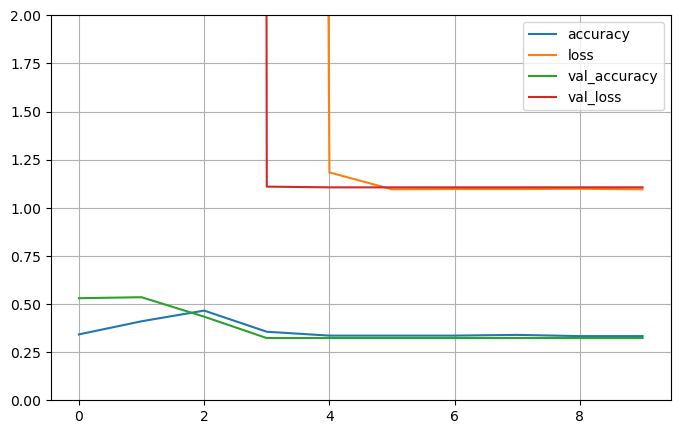

In [53]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

In [54]:
hist1 = CNN_model.fit(train_dta,epochs=10,validation_data=validation_dta)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 896ms/step - accuracy: 0.3160 - loss: 538.3396 - val_accuracy: 0.3434 - val_loss: 105.5988
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 888ms/step - accuracy: 0.3644 - loss: 125.5796 - val_accuracy: 0.3081 - val_loss: 5.0664
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 968ms/step - accuracy: 0.3204 - loss: 1.3070 - val_accuracy: 0.3182 - val_loss: 1.1107
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 890ms/step - accuracy: 0.3283 - loss: 1.1008 - val_accuracy: 0.3283 - val_loss: 1.1013
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 944ms/step - accuracy: 0.3238 - loss: 1.0987 - val_accuracy: 0.3283 - val_loss: 1.1006
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 936ms/step - accuracy: 0.3400 - loss: 1.0990 - val_accuracy: 0.3283 - val_loss: 1.1002
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 912ms/step - accuracy: 0.3406 - loss: 1.0985 - val_accuracy: 0.3283 - val_loss: 1.0998
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 981ms/step - accuracy: 0.3583 - loss: 1.0975 - va

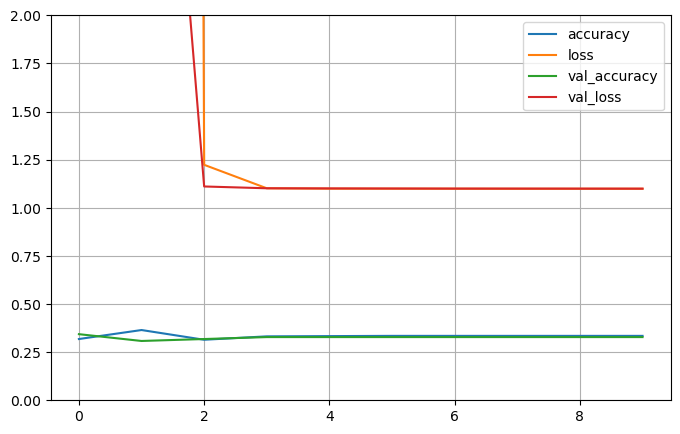

In [55]:
pd.DataFrame(hist1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()